In [1]:
import os,sys
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.models.resnet as models
import h5py
import numpy as np
import scipy.io as sio
import pickle
import pdb
import cv2

In [2]:

data_path = 'C:/Sushree/Jio_Institute/Dataset/Animals_with_Attributes2/JPEGImages/'

or_img = cv2.imread(os.path.join(data_path, 'tiger/tiger_10843.jpg'))
#cv2.imshow('original image', or_img)

resized_img = cv2.resize(or_img, [224, 224])
print(np.shape(resized_img))

gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('grayscale image', gray_img)
print(np.shape(gray_img))

from numpy import expand_dims
from numpy import asarray
from PIL import Image
# load the image
or_img = Image.open(os.path.join(data_path, 'tiger/tiger_10843.jpg'))

resized_img = or_img.resize((224, 224))
print(np.shape(resized_img))

# convert the image to grayscale
gray_img = resized_img.convert(mode='L')
gray_img = asarray(gray_img)

# convert to numpy array
data = asarray(resized_img)
print(data.shape)

# add channels first
data = data.reshape((3, 224, 224))
print(data.shape)
print(data)

(224, 224, 3)
(224, 224)
(224, 224, 3)
(224, 224, 3)
(3, 224, 224)
[[[188 206 169 ...  57 114 148]
  [ 72 132 161 ...  87  16  37]
  [ 65   9  56 ... 144 171  90]
  ...
  [ 87  61  37 ...  44  92  59]
  [216 233 191 ...  81 137 104]
  [ 65 128  95 ... 107  28  56]]

 [[109  80  49 ...  46  93  65]
  [227 242 208 ...  75 121  88]
  [ 56 120  86 ... 119  18  56]
  ...
  [171 171 179 ...  61   2  18]
  [ 57   2  11 ...  36  66  22]
  [ 47 114  26 ... 153 159 170]]

 [[177 177 186 ...  54   1  19]
  [ 55   2  24 ...  36  68  25]
  [ 31 104  27 ... 159 163 175]
  ...
  [ 25  45  14 ... 199 161 172]
  [192  98 115 ...  30  30  25]
  [ 25  24  26 ...  33 109  38]]]


# Extract gabor features

In [3]:
from skimage.filters import gabor_kernel
from scipy import ndimage as nd        
import matplotlib
import matplotlib.pyplot as plt    

kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta = theta, sigma_x = sigma, sigma_y = sigma))
            kernels.append(kernel)
            
def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats    


result = compute_feats(gray_img, kernels)
print(np.shape(result))

(16, 2)


In [4]:

def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    print(np.shape(image))
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 + nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = gabor_kernel(frequency, theta = theta, sigma_x = sigma, sigma_y = sigma)
            params = 'theta=%d,\nfrequency=%.2f, \nsigma_x=%d, \nsigma_y=%d' % (theta * 180 / np.pi, frequency, sigma, sigma)
            kernel_params.append(params)
            res_pow = power(gray_img, kernel)
            # Save kernel and the power image for each image
            results.append((kernel, res_pow))

            

(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)


In [5]:
print(np.shape(results))
print(np.shape(kernel_params))
print(np.shape(kernel))
print(np.shape(res_pow))

(16, 2)
(16,)
(15, 15)
(224, 224)


C:\Users\Sushree.Behera\anaconda3\envs\tf_sushree\Lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(-0.5, 223.5, 223.5, -0.5)

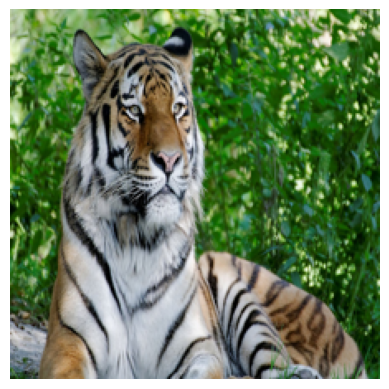

In [6]:
plt.imshow(resized_img)
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

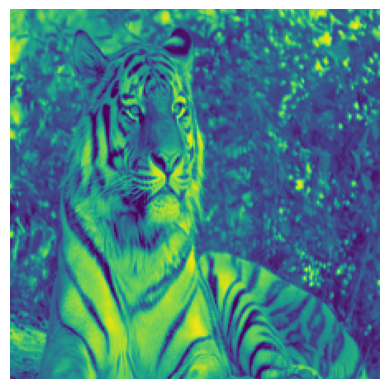

In [7]:

plt.imshow(gray_img)
plt.axis('off')

0.001153458382947945
2.355809550811354
0.0018617555057501868
1.1631063805127955
0.00015852942944444593
1.5334071424157147
0.0002776234938465515
0.34614229764748183
0.00035963606068656546
2.3538637031679914
0.0023081273812011736
1.068614161711202
0.0021934914152755332
1.5117176964298105
0.0001329703474531837
0.4028944207683083
0.002255118557437053
2.353804226508085
0.001567511581770618
0.9298163894734476
0.000622792261411837
1.5027941558801574
8.758115522712277e-05
0.4133457206062921
0.0008262515246336362
2.355771281537395
0.0012549255109715405
0.9812542842869613
0.0011059455489339511
1.523197916601379
4.139569991788489e-05
0.38858407019937247


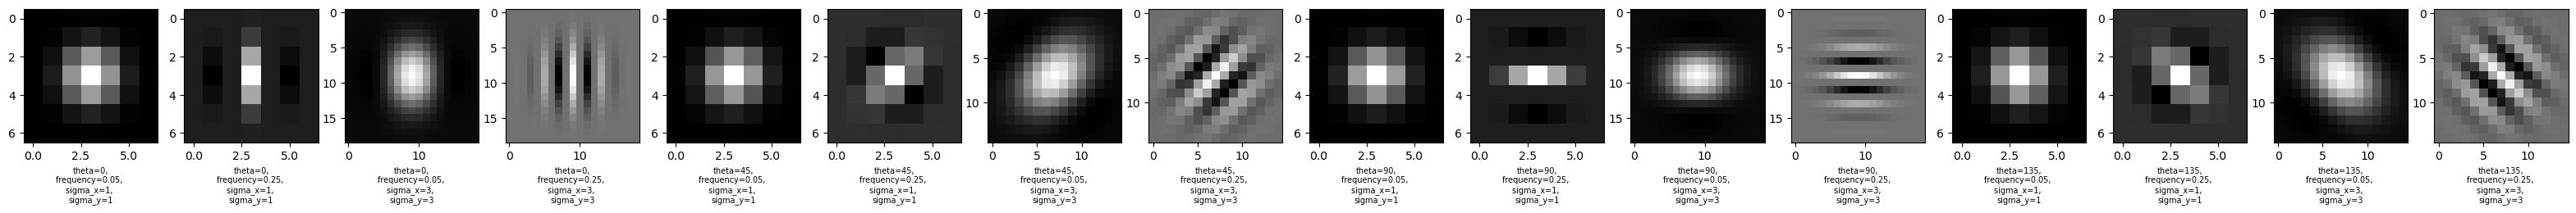

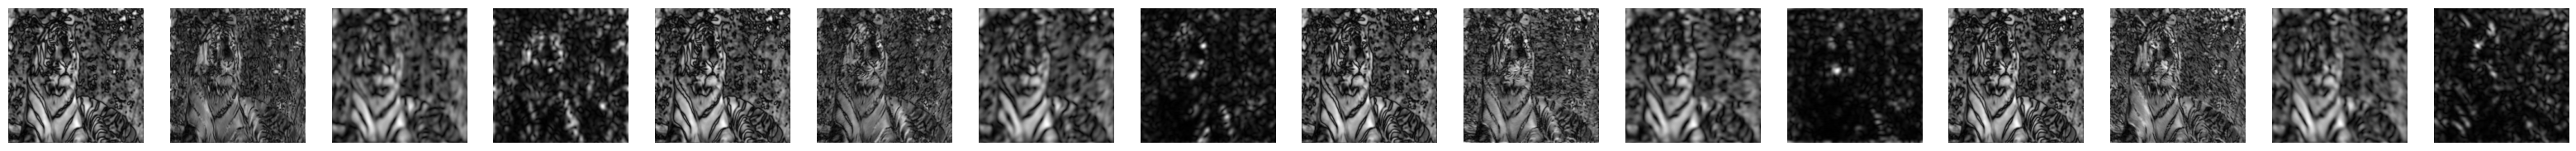

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=16, figsize=(40, 48))
plt.gray()
for label, (kernel, powers), ax in zip(kernel_params, results, axes[0:]):
    #print(np.shape(kernel))
    #print(np.shape(powers))
    # Plot Gabor kernel
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_xlabel(label, fontsize=7)
    #ax.set_xticks([])
    #ax.set_yticks([])
    
fig, axes = plt.subplots(nrows=1, ncols=16, figsize=(40, 48))
plt.gray()   
for label, (kernel, powers), ax in zip(kernel_params, results, axes[0:]):
    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    print(vmin)
    vmax = np.max(powers)
    print(vmax)
    ax.imshow(powers, vmin=vmin, vmax=vmax)
    ax.axis('off')

plt.show()

0.2784012489186096
18.387926401687963
(224, 224)


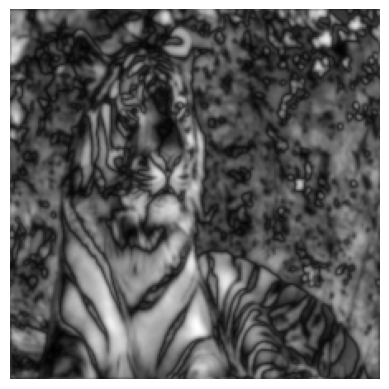

In [9]:
power_tot = np.zeros(powers.shape)
for (kernel, powers) in results:
    power_tot = np.add(power_tot, powers)

fig = plt.plot()    
vmin = np.min(power_tot)
print(vmin)
vmax = np.max(power_tot)
print(vmax)
print(np.shape(power_tot))
plt.imshow(power_tot, vmin=vmin, vmax=vmax)
plt.axis('off')

plt.show()

#x = tf.random.normal(shape=(1,224,224))
#x.shape

In [ ]:

data_path = 'E:/Sushree/Dataset/Animals_with_Attributes2/JPEGImages/'



# load the image
or_img = Image.open(os.path.join(data_path, 'tiger/tiger_10843.jpg'))

resized_img = or_img.resize((224, 224))
print(np.shape(resized_img))

# convert the image to grayscale
gray_img = resized_img.convert(mode='L')
gray_img = asarray(gray_img)
print(np.shape(gray_img))

gabor_feat = compute_gabor_feats(gray_img, kernels)
print(np.shape(gabor_feat))

gabor_feat = np.expand_dims(gabor_feat, axis=0)
print(np.shape(gabor_feat))

In [10]:
model_transform_handcrafted = nn.Sequential(
    nn.Flatten(),
    nn.Linear(50176, 2048),
    nn.ReLU(),
    nn.Linear(2048, 1024),
    nn.ReLU()
)

from torchsummary import summary
summary(model_transform_handcrafted, (224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 50176]               0
            Linear-2                 [-1, 2048]     102,762,496
              ReLU-3                 [-1, 2048]               0
            Linear-4                 [-1, 1024]       2,098,176
              ReLU-5                 [-1, 1024]               0
Total params: 104,860,672
Trainable params: 104,860,672
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.43
Params size (MB): 400.01
Estimated Total Size (MB): 400.63
----------------------------------------------------------------


In [11]:
from torch.autograd import Variable
to_tensor = transforms.ToTensor()
t_power_tot = Variable(to_tensor(power_tot))
t_power_tot = t_power_tot.to(torch.float32)
print(t_power_tot, t_power_tot.shape)

transformed_handcrafted_features = model_transform_handcrafted(t_power_tot)
print(transformed_handcrafted_features, transformed_handcrafted_features.shape)

tensor([[[6.5467, 6.8096, 6.9987,  ..., 3.0713, 4.3253, 5.6513],
         [9.1599, 9.3531, 9.5108,  ..., 3.2995, 6.4084, 8.2650],
         [9.4700, 9.5842, 9.8238,  ..., 3.1801, 6.3821, 8.5699],
         ...,
         [4.5868, 4.2211, 4.0504,  ..., 5.8052, 5.9839, 5.3336],
         [5.6936, 5.9231, 5.8063,  ..., 5.8468, 5.9063, 5.3566],
         [4.6570, 5.1528, 5.1502,  ..., 5.0123, 4.5604, 4.0239]]]) torch.Size([1, 224, 224])
tensor([[0.0000, 0.3769, 0.6427,  ..., 0.0000, 0.0000, 0.7549]],
       grad_fn=<ReluBackward0>) torch.Size([1, 1024])


# Find Deep visual features

In [12]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Batch size for training (change depending on how much memory you have)
batch_size = 32

model_ref = models.resnet101(pretrained=True)
model_ref.eval()
summary(model_ref, (3, 224, 224))

model_f = nn.Sequential(*list(model_ref.children())[:-2])
model_f.eval()

for param in model_f.parameters():
    param.requires_grad = False
    

summary(model_f, (3, 224, 224))

C:\Users\Sushree.Behera\anaconda3\envs\tf_sushree\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sushree.Behera\anaconda3\envs\tf_sushree\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [13]:

import torchvision.transforms as transforms

or_img = Image.open(os.path.join(data_path, 'tiger/tiger_10843.jpg'))

scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

to_tensor = transforms.ToTensor()
t_img = Variable(normalize(to_tensor(scaler(or_img))).unsqueeze(0))

print(t_img, t_img.shape)

tensor([[[[ 1.1015,  0.9303,  0.9646,  ..., -0.7308,  0.3652,  0.3652],
          [ 1.0844,  0.8961,  0.8789,  ..., -0.5596,  0.7762,  0.8276],
          [ 0.9988,  0.8104,  0.7933,  ..., -0.6965,  0.6906,  0.9303],
          ...,
          [-1.0904, -0.9363, -1.0904,  ..., -1.7240, -1.7069, -1.6727],
          [-1.5528, -1.5699, -1.5870,  ..., -1.6898, -1.7412, -1.6384],
          [-1.6727, -1.8439, -1.7240,  ..., -1.6727, -1.6727, -1.5699]],

         [[ 1.5707,  1.4482,  1.5357,  ...,  0.1702,  1.0805,  0.9930],
          [ 1.5532,  1.4132,  1.4482,  ...,  0.2402,  1.3606,  1.3957],
          [ 1.4657,  1.3081,  1.3431,  ...,  0.0476,  1.1856,  1.4832],
          ...,
          [-0.3901, -0.1800, -0.3200,  ..., -0.2850, -0.5651, -0.3375],
          [-1.0553, -0.8102, -1.1078,  ..., -0.4426, -0.7752, -0.2500],
          [-1.2129, -1.2654, -1.3354,  ..., -0.7752, -0.8277, -0.1975]],

         [[ 1.1411,  1.0888,  1.1411,  ..., -0.8633, -0.0267, -0.1835],
          [ 1.0714,  1.0017,  

In [14]:
features = model_f(t_img)
print(features, features.shape)

tensor([[[[0.0000e+00, 0.0000e+00, 4.0295e-01,  ..., 5.4670e-01,
           1.4916e-01, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           4.6495e-01, 2.4750e-01],
          [0.0000e+00, 0.0000e+00, 2.1679e-02,  ..., 0.0000e+00,
           1.3831e+00, 1.4185e+00],
          ...,
          [0.0000e+00, 1.9689e-01, 2.8656e-01,  ..., 6.5178e-01,
           1.3667e+00, 1.1591e+00],
          [2.2347e-01, 2.3784e-01, 6.2466e-01,  ..., 4.0475e-01,
           9.6652e-01, 1.1659e+00],
          [1.5211e-02, 1.1490e-01, 4.4300e-01,  ..., 3.3617e-01,
           5.4576e-01, 9.5092e-01]],

         [[2.2102e-01, 3.2891e-01, 2.5870e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [4.6943e-01, 1.4098e-01, 2.2812e-01,  ..., 0.0000e+00,
           1.0809e-01, 2.2351e-01],
          [4.9980e-01, 2.5010e-01, 3.7946e-01,  ..., 3.4691e-02,
           2.5590e-01, 5.0084e-01],
          ...,
          [3.8265e-01, 4.8776e-01, 3.0212e-01,  ..., 6.0809

In [15]:
model_transform_visual = nn.Sequential(
    nn.Flatten(),
    nn.Linear(100352, 2048),
    nn.ReLU(),
    nn.Linear(2048, 1024),
    nn.ReLU()
)

from torchsummary import summary
summary(model_transform_visual, (2048, 7, 7))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1               [-1, 100352]               0
            Linear-2                 [-1, 2048]     205,522,944
              ReLU-3                 [-1, 2048]               0
            Linear-4                 [-1, 1024]       2,098,176
              ReLU-5                 [-1, 1024]               0
Total params: 207,621,120
Trainable params: 207,621,120
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.38
Forward/backward pass size (MB): 0.81
Params size (MB): 792.01
Estimated Total Size (MB): 793.21
----------------------------------------------------------------


In [16]:
transformed_visual_features = model_transform_visual(features)
print(transformed_visual_features, transformed_visual_features.shape)

tensor([[0.0824, 0.0644, 0.0000,  ..., 0.0000, 0.1233, 0.1520]],
       grad_fn=<ReluBackward0>) torch.Size([1, 1024])


# Find correlation

In [17]:
#kernel = gabor_kernel(0.5, theta = theta / 4. * np.pi, sigma_x = 0.1, sigma_y = 0.9)
#result = power(gray_img, kernel)
#print(np.shape(result))
#result_vec = np.reshape(result, [1, np.shape(result)[1]*np.shape(result)[0]])
#print(np.shape(result_vec))

In [22]:
from torch import Tensor

#transformed_visual_features = Tensor.detach(transformed_visual_features).numpy()
#transformed_handcrafted_features = Tensor.detach(transformed_handcrafted_features).numpy()

corr_coeff = np.corrcoef(transformed_visual_features, transformed_handcrafted_features)
print(corr_coeff)
print(np.shape(corr_coeff))

[[1.         0.02257497]
 [0.02257497 1.        ]]
(2, 2)


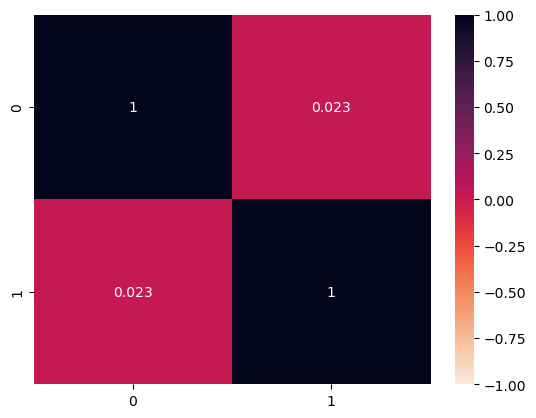

In [23]:
import seaborn as sns

sns.heatmap(corr_coeff, vmin=-1, vmax=1, annot=True,cmap="rocket_r")
plt.show()

# 